In [1]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay


from mpitree.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X, y = iris.data[:, :2], iris.target

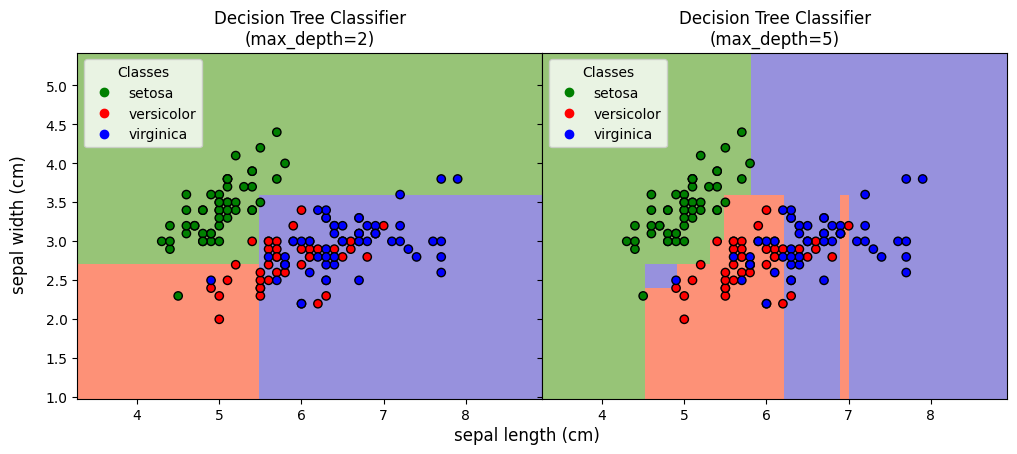

In [3]:
fig, axs = plt.subplots(
    ncols=2,
    sharex="col",
    sharey="row",
    figsize=(12, 4.5),
    # facecolor="#ded7b7fb",
    gridspec_kw={"wspace": 0, "hspace": 0},
)

for ax, depth in zip(axs, (2, 5)):
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        plot_method="pcolormesh",
        ax=ax,
        cmap=ListedColormap(["#97c477", "#fd9177", "#9791dd"]),
    )
    scatter = disp.ax_.scatter(
        X[:, 0],
        X[:, 1],
        cmap=ListedColormap(["#008000", "#ff0000", "#0000ff"]),
        c=y,
        edgecolors="k",
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="upper left",
        title="Classes",
    )
    _ = disp.ax_.set_title(f"Decision Tree Classifier\n(max_depth={depth})")

fig.supxlabel("sepal length (cm)")
fig.supylabel("sepal width (cm)", x=0.069)

plt.show()

In [4]:
clf = DecisionTreeClassifier().fit(X, y)
print(clf.export_text(feature_names=iris.feature_names, class_names=iris.target_names))

┌── sepal length (cm)
│  ├── sepal width (cm) [> 5.50]
│  │  ├── sepal length (cm) [> 3.60]
│  │  │  ├── setosa [<= 5.80]
│  │  │  └── virginica [> 5.80]
│  │  └── sepal length (cm) [<= 3.60]
│  │     ├── sepal length (cm) [> 6.20]
│  │     │  ├── sepal length (cm) [<= 7.00]
│  │     │  │  ├── sepal width (cm) [<= 6.90]
│  │     │  │  │  ├── sepal length (cm) [> 2.30]
│  │     │  │  │  │  ├── sepal width (cm) [> 6.50]
│  │     │  │  │  │  │  ├── sepal length (cm) [<= 3.10]
│  │     │  │  │  │  │  │  ├── sepal width (cm) [> 6.60]
│  │     │  │  │  │  │  │  │  ├── sepal width (cm) [> 2.50]
│  │     │  │  │  │  │  │  │  │  ├── sepal length (cm) [> 2.80]
│  │     │  │  │  │  │  │  │  │  │  ├── sepal length (cm) [> 6.70]
│  │     │  │  │  │  │  │  │  │  │  │  ├── virginica [<= 6.80]
│  │     │  │  │  │  │  │  │  │  │  │  └── virginica [> 6.80]
│  │     │  │  │  │  │  │  │  │  │  └── sepal width (cm) [<= 6.70]
│  │     │  │  │  │  │  │  │  │  │     ├── versicolor [<= 3.00]
│  │     │  │  │  

In [5]:
x_axis = range(1, 250, 10)
y_axis = []

for x in x_axis:
    X = np.array([[i] for i in range(x)])
    y = np.arange(len(X))

    start = time.time()
    DecisionTreeClassifier().fit(X, y)
    end = time.time()

    y_axis.append((end - start) * 1000)

In [6]:
time_data = pd.read_csv("time_data.csv", header=None)

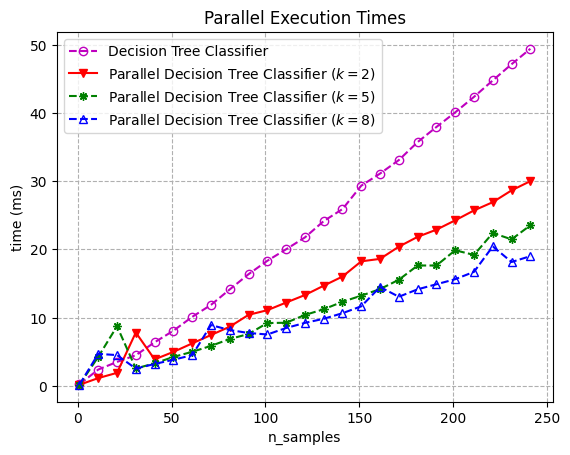

In [7]:
fig = plt.figure()
# fig.set_facecolor("#ded7b7fb")
ax = fig.add_subplot()

ax.plot(
    x_axis,
    y_axis,
    c="m",
    marker="o",
    ls="--",
    label="Decision Tree Classifier",
    fillstyle="none",
)

ax.plot(
    x_axis,
    time_data.iloc[0],
    c="r",
    marker="v",
    ls="-",
    label="Parallel Decision Tree Classifier $(k=2)$",
)

ax.plot(
    x_axis,
    time_data.iloc[1],
    c="g",
    marker=(8, 2, 0),
    ls="--",
    label="Parallel Decision Tree Classifier $(k=5)$",
)

ax.plot(
    x_axis,
    time_data.iloc[2],
    c="b",
    marker="^",
    ls="--",
    label="Parallel Decision Tree Classifier $(k=8)$",
    fillstyle="none",
)

# ax.set_facecolor("#fff4c4")
ax.set_xlabel("n_samples")
ax.set_ylabel("time (ms)")

plt.title("Parallel Execution Times")
plt.legend(loc=2)
plt.grid(ls="--")
plt.show()